# 나이스비즈 전처리
#### 'ind_rank', 'payroll', 'new_payroll', 'employee' 은 범주형 변수, 최빈값으로 NaN처리
#### 'employment', 'resignation', 'cmp_years' 은 중앙값 처리

In [75]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
import seaborn as sns
# 한글
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()

In [11]:
df_raw = pd.read_excel('bizinfo_df.xlsx')
df_raw

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,"~ 4,000만원 미만","~ 4,000만원 미만",-,0.00 % (0 ...,0.00 % (0 ...,53 년
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,80.00 % (4 ...,60.00 % (3 ...,55 년
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",1명 이상 ~ 20명 미만,12.50 % (1 ...,25.00 % (2 ...,- 년
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",-,0.00 % (0 ...,0.00 % (0 ...,- 년
...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",-,0.00 % (0 ...,0.00 % (0 ...,6 년
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,6.0,"~ 4,000만원 미만","~ 4,000만원 미만",100명 이상 ~ 200명 미만,73.68 % (14 ...,94.74 % (18 ...,11 년
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,"~ 4,000만원 미만","~ 4,000만원 미만",40명 이상 ~ 70명 미만,6.25 % (5 ...,57.50 % (46 ...,6 년


In [62]:
df_pre = pd.read_excel('bizinfo_df_prep.xlsx')
df_pre

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,NaN,0.0000,0.0000,53.0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,NaN
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,NaN,0.0000,0.0000,NaN
...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,NaN,0.0000,0.0000,6.0
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0


In [63]:
# 결측치 데이터 확인
df_pre.isna().sum()

사업자번호              0
address         1380
industry        1379
ind_rank        4409
payroll         7653
new_payroll     7653
employee       12531
employment      7912
resignation     7798
cmp_years      11605
dtype: int64

In [64]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35709 entries, 0 to 35708
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사업자번호        35709 non-null  int64  
 1   address      34329 non-null  object 
 2   industry     34330 non-null  object 
 3   ind_rank     31300 non-null  float64
 4   payroll      28056 non-null  float64
 5   new_payroll  28056 non-null  float64
 6   employee     23178 non-null  float64
 7   employment   27797 non-null  float64
 8   resignation  27911 non-null  float64
 9   cmp_years    24104 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.7+ MB


In [65]:
df_pre.describe()

,사업자번호,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
count,3.570900e+04,31300.000000,28056.000000,28056.000000,23178.000000,27797.000000,27911.000000,24104.000000
mean,3.312637e+09,4.447252,1.336969,1.043663,2.747778,0.403423,0.352889,17.244067
std,2.173786e+09,0.742685,0.501869,0.208833,1.671642,1.353234,0.506534,11.278422
min,1.018100e+09,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.318112e+09,4.000000,1.000000,1.000000,1.000000,0.000000,0.090900,8.000000
50%,2.268531e+09,4.000000,1.000000,1.000000,2.000000,0.235300,0.272700,15.000000
75%,5.138157e+09,5.000000,2.000000,1.000000,4.000000,0.466200,0.478300,23.000000
max,8.998801e+09,7.000000,5.000000,5.000000,9.000000,103.000000,44.801700,111.000000


In [66]:
df_pre.columns

Index(['사업자번호', 'address', 'industry', 'ind_rank', 'payroll', 'new_payroll',
       'employee', 'employment', 'resignation', 'cmp_years'],
      dtype='object')

In [72]:
# 'ind_rank', 'payroll', 'new_payroll', 'employee' 은 범주형 변수, 최빈값으로 NaN처리
#  'employment', 'resignation', 'cmp_years' 은 중앙값 처리
c_list = ['ind_rank', 'payroll', 'new_payroll', 'employee']
median_list = ['employment', 'resignation', 'cmp_years']
for c_col in c_list :
    df_pre[c_col] = df_pre[c_col].fillna(df_pre[c_col].mode()[0])
for med_col in median_list:
    df_pre[med_col] = df_pre[med_col].fillna(df_pre[med_col].median())
df_pre

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0
...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0


In [85]:
df_pre.isna().sum()

사업자번호             0
address        1380
industry       1379
ind_rank          0
payroll           0
new_payroll       0
employee          0
employment        0
resignation       0
cmp_years         0
dtype: int64

In [74]:
df_pre_drop = df_pre.dropna()
df_pre_drop

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0
...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0
35705,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0
35706,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0
35707,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0


In [76]:
# 산업 추가된 파일 불러오기
nb_active_out = pd.read_excel('액티브_중소법인_기업외감_산업분류.xlsx')
nb_deactive_ind = pd.read_excel('휴폐업_중소법인_기업개요_산업분류.xlsx')
nb_finance_data = pd.read_csv('재무데이터.txt', encoding='cp949', sep='\t')

In [77]:
# 액티브 / 휴폐업 구분
nb_active_out['target'] = '0'
nb_deactive_ind['target'] = '1'

In [86]:
# 재무데이터 파일에 휴폐업 정보 머지
nice_merge = pd.merge(df_pre_drop, nb_active_out[['BIZ_NO', 'target']], how='left', left_on='사업자번호',right_on='BIZ_NO')
nice_merge = pd.merge(nice_merge, nb_deactive_ind[['BIZ_NO', 'target']], how='left', left_on='사업자번호',right_on='BIZ_NO')
nice_merge

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,BIZ_NO_x,target_x,BIZ_NO_y,target_y
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,1.018100e+09,0,NaN,NaN
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0,1.018101e+09,0,NaN,NaN
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,1.018101e+09,0,NaN,NaN
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0,1.018101e+09,0,NaN,NaN
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0,1.018104e+09,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0,NaN,NaN,8.998700e+09,1
34325,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,NaN,NaN,8.998701e+09,1
34326,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,8.998800e+09,0,NaN,NaN
34327,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,8.998800e+09,0,NaN,NaN


In [87]:
nice_merge.isna().sum()

사업자번호              0
address            0
industry           0
ind_rank           0
payroll            0
new_payroll        0
employee           0
employment         0
resignation        0
cmp_years          0
BIZ_NO_x        6220
target_x        6220
BIZ_NO_y       28109
target_y       28109
dtype: int64

In [88]:
# NaN 값 처리 및 결과 확인
nice_merge.target_x.fillna('', inplace=True)
nice_merge.target_y.fillna('', inplace=True)
nice_merge['target'] = nice_merge.target_x + nice_merge.target_y
nice_merge = nice_merge.drop(nice_merge[nice_merge.target == ''].index)
nice_merge = nice_merge[nice_merge.columns.drop(['BIZ_NO_x', 'target_x', 'BIZ_NO_y', 'target_y'])]
nice_merge

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,target
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,0
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0,0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0,0
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...
34324,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0,1
34325,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,1
34326,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,0
34327,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,0


In [89]:
# nice_merge_분포 확인
nice_merge.target.value_counts()

0    28109
1     6220
Name: target, dtype: int64

In [90]:
nice_merge.isna().sum()

사업자번호          0
address        0
industry       0
ind_rank       0
payroll        0
new_payroll    0
employee       0
employment     0
resignation    0
cmp_years      0
target         0
dtype: int64

In [91]:
nice_merge.to_csv('nice_biz_preprocessed_target.csv', index=False)

In [105]:
nice_merge = pd.read_csv('nice_biz_preprocessed_target.csv')
nice_merge

,사업자번호,address,industry,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,target
0,1018100340,서울 종로구 삼일대로 428,비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,0
1,1018100772,서울 종로구 청계천로 137,(I55101)호텔업,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0,0
2,1018101126,서울 종로구 율곡로 84,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,0
3,1018101242,서울 종로구 종로12길 15,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0,0
4,1018103819,서울 종로구 종로 125,(L68112)비주거용 건물 임대업,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...
34324,8998700283,"경남 창원시 성산구 중앙대로 56, 3층 303-1호",(F41100)건물 건설업,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0,1
34325,8998701263,서울 영등포구 의사당대로 82,(K66199)그 외 기타 금융 지원 서비스업,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,1
34326,8998800150,부산 남구 전포대로 26,(M71531)경영 컨설팅업,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,0
34327,8998800427,충남 천안시 서북구 입장면 성진로 1192-6,(C26299)그 외 기타 전자부품 제조업,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,0


In [95]:
# finance 데이터와 결합
finan_df = pd.read_csv('재무데이터_액티브외감(0)_휴폐업(1)_머지.csv')
finan_df

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,...,부채총계대 매출액(%),총자본회전율(회),재고자산회전율(회),매출채권회전율(회),매입채무회전율(회),미수금,매출원가,무형자산,재고자산,target
0,1018100340,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,721100.0,...,2.503123e+02,1.642500e-01,1.000000e+12,5.171175e+01,1.000000e+12,3243.000000,2.278457e+07,1.180309e+06,7.150063e+06,0
1,1018100772,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,...,2.489536e+03,3.875000e-02,1.000000e+12,2.500000e+11,1.000000e+12,441694.500000,5.181350e+05,1.180309e+06,7.150063e+06,0
2,1018101126,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,1539640.0,...,4.684630e+02,8.025000e-02,1.000000e+12,2.581250e+01,1.000000e+12,902.750000,1.516039e+06,5.275000e+02,7.150063e+06,0
3,1018101242,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,450000.0,...,3.380270e+02,1.075000e-01,1.000000e+12,1.859625e+01,1.000000e+12,442720.533731,1.178152e+06,1.180309e+06,7.150063e+06,0
4,1018103819,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,500000.0,...,7.660750e+02,8.225000e-02,1.000000e+12,2.059725e+01,1.000000e+12,12500.000000,2.278457e+07,1.180309e+06,7.150063e+06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35704,8998700283,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,...,1.476500e+01,2.181500e+00,5.713500e+00,8.110500e+00,1.325500e+01,442720.533731,2.736914e+06,1.180309e+06,3.406730e+05,1
35705,8998701263,9.025398e+06,4.323139e+06,1.887536e+07,1.324823e+07,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,...,9.444444e+11,3.333333e+11,1.000000e+12,1.000000e+12,1.000000e+12,442720.533731,2.278457e+07,1.180309e+06,7.150063e+06,1
35706,8998800150,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,...,6.216600e+01,1.053750e+00,8.888400e+01,2.279075e+01,1.078650e+01,6738.750000,1.384895e+06,1.057015e+05,4.167090e+05,0
35707,8998800427,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,489500.0,...,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,2.500000e+11,321181.333333,1.542906e+07,4.426120e+05,2.826867e+06,0


In [108]:
# 두파일 사업자번호로 머지
nice_col = ['사업자번호', 'ind_rank', 'payroll', 'new_payroll',
       'employee', 'employment', 'resignation', 'cmp_years', 'target']
# del finan_df['target']
nice_fin_merge = pd.merge(finan_df, nice_merge[nice_col], how='inner', on='사업자번호')
nice_fin_merge

,사업자번호,유동자산,매출채권,비유동자산,유형자산,자산총계,유동부채,비유동부채,부 채 총 계,자본금,...,무형자산,재고자산,ind_rank,payroll,new_payroll,employee,employment,resignation,cmp_years,target
0,1018100340,2.070964e+06,1.433848e+05,3.549089e+07,1.118161e+06,3.756186e+07,5.333542e+06,1.045350e+07,1.578704e+07,721100.0,...,1.180309e+06,7.150063e+06,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,0
1,1018100772,4.828732e+05,1.218333e+04,2.089307e+07,2.088182e+07,2.137594e+07,3.142721e+06,1.204274e+07,1.518546e+07,52000.0,...,1.180309e+06,7.150063e+06,5.0,1.0,1.0,1.0,0.0000,0.0000,53.0,0
2,1018101126,1.491190e+06,1.021362e+05,3.550742e+07,3.435322e+07,3.699861e+07,8.974535e+06,3.180149e+06,1.215468e+07,1539640.0,...,5.275000e+02,7.150063e+06,4.0,1.0,1.0,1.0,0.8000,0.6000,55.0,0
3,1018101242,5.428135e+05,1.440118e+05,2.465907e+07,2.200939e+07,2.520188e+07,6.706615e+06,2.318500e+06,9.025115e+06,450000.0,...,1.180309e+06,7.150063e+06,4.0,1.0,1.0,1.0,0.1250,0.2500,15.0,0
4,1018103819,1.667547e+06,4.804125e+04,1.150967e+07,1.108649e+07,1.317722e+07,6.715410e+06,1.568218e+06,8.283628e+06,500000.0,...,1.180309e+06,7.150063e+06,4.0,1.0,1.0,1.0,0.0000,0.0000,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,8998700283,1.008218e+06,4.940150e+05,2.950450e+05,2.750500e+04,1.303263e+06,2.843760e+05,1.480000e+05,4.323760e+05,503000.0,...,1.180309e+06,3.406730e+05,4.0,1.0,1.0,1.0,0.0000,0.0000,6.0,1
34325,8998701263,9.025398e+06,4.323139e+06,1.887536e+07,1.324823e+07,9.025398e+06,1.655333e+03,7.272607e+05,7.289157e+05,459000.0,...,1.180309e+06,7.150063e+06,4.0,1.0,1.0,1.0,0.2353,0.2727,15.0,1
34326,8998800150,8.987382e+06,1.454567e+06,2.287665e+07,1.850289e+07,3.186404e+07,1.800650e+07,1.739726e+06,1.974623e+07,990000.0,...,1.057015e+05,4.167090e+05,4.0,1.0,1.0,5.0,0.7368,0.9474,11.0,0
34327,8998800427,7.198705e+06,2.728476e+06,7.227014e+06,6.594312e+06,1.442572e+07,7.778158e+06,4.469290e+06,1.224745e+07,489500.0,...,4.426120e+05,2.826867e+06,5.0,1.0,1.0,3.0,0.0625,0.5750,6.0,0


In [110]:
# 결측값 확인
nice_fin_merge.isna().sum().sum()

0

In [112]:
# 사업자 번호 제거
del nice_fin_merge['사업자번호']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(nice_fin_merge[nice_fin_merge.columns[:-1]], nice_fin_merge.target,test_size=0.2, stratify=nice_fin_merge.target, random_state=2022)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((27463, 51), (6866, 51), (27463,), (6866,))

의사결정 나무 모델 정확도 :  0.9398485289833964


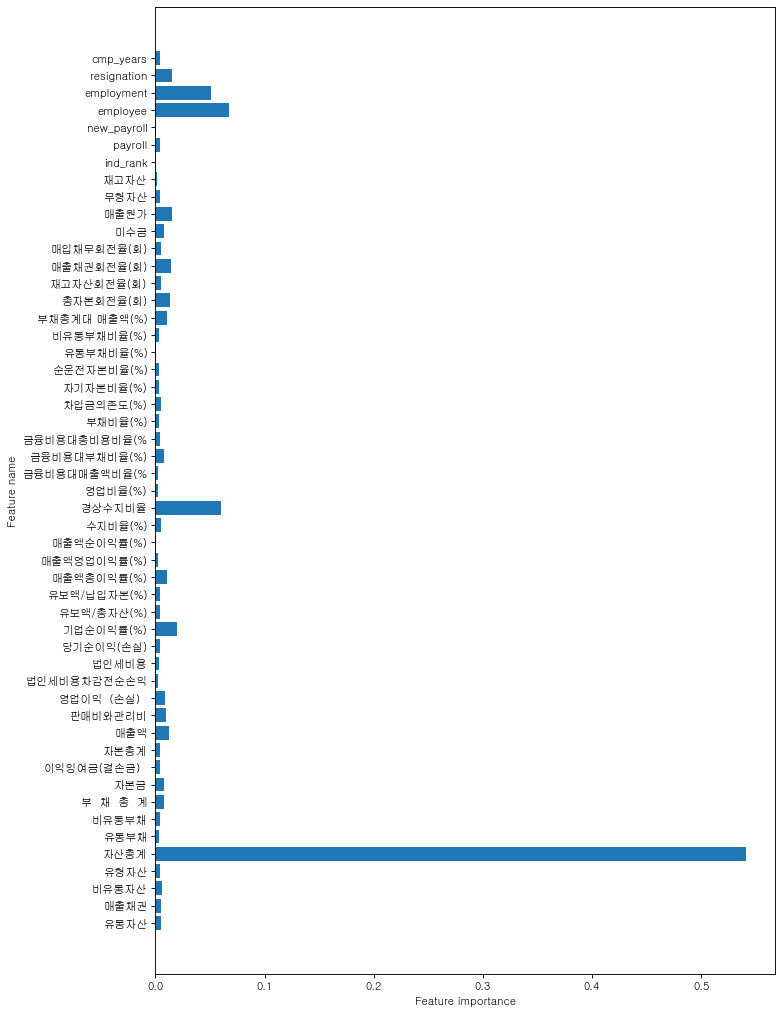

In [114]:
# 의사결정나무 모델
dtc_stock = DecisionTreeClassifier(random_state=2022).fit(X_train, y_train)
print( '의사결정 나무 모델 정확도 : ', dtc_stock.score(X_test, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), dtc_stock.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

랜덤포레스트 정확도  :  0.9596562773084766


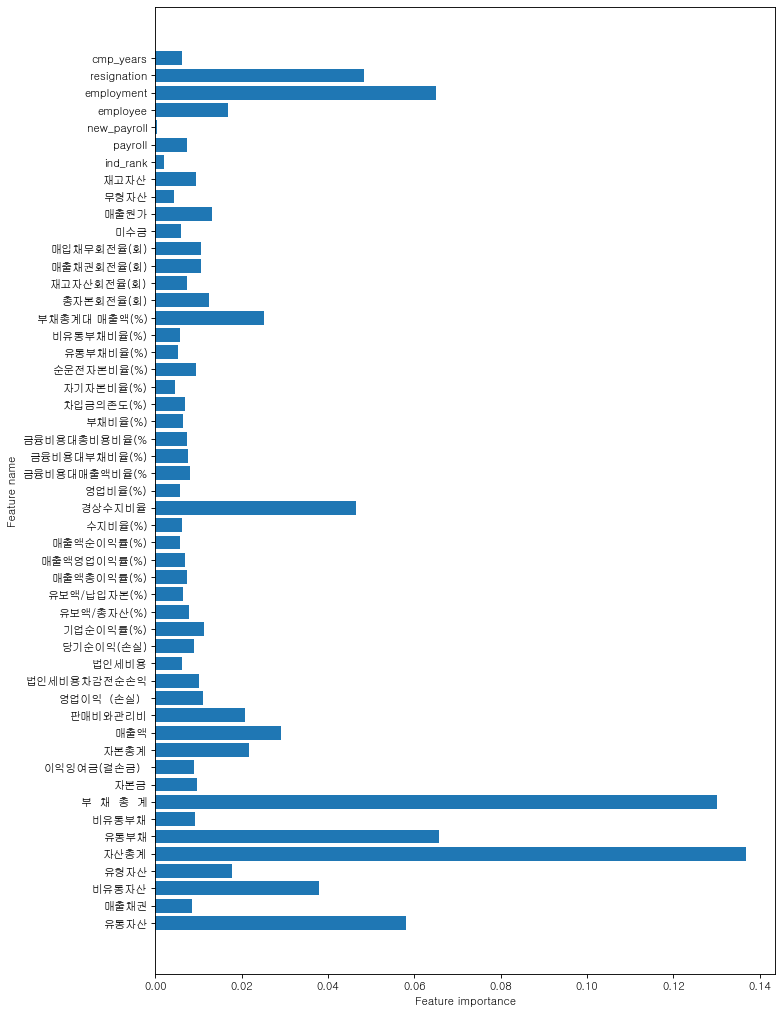

In [115]:
# 랜덤포레스트
rfc = RandomForestClassifier(random_state=2022).fit(X_train, y_train)
print('랜덤포레스트 정확도  : ' ,rfc.score(X_test, y_test))
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm , rc
font = fm.FontProperties(fname='C:\Windows\Fonts/gulim.ttc').get_name()
rc('font', family=font)
plt.figure(figsize=(10,16), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), rfc.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("Feature name")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [118]:
# f1_score
pred = rfc.predict(X_test)
f1_score(y_test, pred, pos_label=1)


0.8795128316659417

### 기존의 랜덤포레스트 f1_score 대비 약 4%의 정확도 상승
### 유의미한 지표로 employment와 resignation 확인 및 인사이트 도출 